<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

In [3]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
print(tf.__version__)
# 현재 model.predict() 의 속도가 느린 문제가 있어서 eager_execution을 끕니다.
# 관련 버그 이슈 링크: https://github.com/tensorflow/tensorflow/issues/32104
tf.compat.v1.disable_eager_execution()
import numpy as np

2.2.0


In [0]:
!pip install gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg

!apt-get update
!apt-get install cmake
!pip install --upgrade setuptools
!pip install ez_setup
!pip install gym[atari]

!pip install box2d-py
!pip install gym[Box_2D]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 28 not upgraded.
Need to get 1,280 kB of archives.
After this operation, 7,682 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.3 [783 kB]
Fetched 1,280 kB in 1s (953 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 132681 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Selecting previously unselected package xvfb.
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.3

  Created wheel for ez-setup: filename=ez_setup-0.9-cp36-none-any.whl size=11014 sha256=9a27c6bd70287c830c82d29abb66fbc28fa2e0f02be964d8db4ea53c223bd6af
  Stored in directory: /root/.cache/pip/wheels/dc/e8/6b/3d5ff5a3efd7b5338d1e173ac981771e2628ceb2f7866d49ad
Successfully built ez-setup
     |████████████████████████████████| 450kB 2.8MB/s 


In [2]:
!pip install pyglet

# 10.1 신경망으로 경험 학습하기

In [0]:
# 10.1 MountainCar-v0 환경 만들기
import gym
import random
env = gym.make('MountainCar-v0')

In [0]:
# 10.2 환경의 관찰 공간, 행동 공간 변수 확인
print(env.observation_space)
print(env.observation_space.low)
print(env.observation_space.high)
print()
print(env.action_space)
print()
print(env._max_episode_steps)

Box(2,)
[-1.2  -0.07]
[0.6  0.07]

Discrete(3)

200


In [0]:
# 10.3 랜덤한 행동을 하는 에이전트 실행
step = 0
score = 0
env.reset()

while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print(score)
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)

0
-1.0
-2.0
-3.0
-4.0
-5.0
-6.0
-7.0
-8.0
-9.0
-10.0
-11.0
-12.0
-13.0
-14.0
-15.0
-16.0
-17.0
-18.0
-19.0
-20.0
-21.0
-22.0
-23.0
-24.0
-25.0
-26.0
-27.0
-28.0
-29.0
-30.0
-31.0
-32.0
-33.0
-34.0
-35.0
-36.0
-37.0
-38.0
-39.0
-40.0
-41.0
-42.0
-43.0
-44.0
-45.0
-46.0
-47.0
-48.0
-49.0
-50.0
-51.0
-52.0
-53.0
-54.0
-55.0
-56.0
-57.0
-58.0
-59.0
-60.0
-61.0
-62.0
-63.0
-64.0
-65.0
-66.0
-67.0
-68.0
-69.0
-70.0
-71.0
-72.0
-73.0
-74.0
-75.0
-76.0
-77.0
-78.0
-79.0
-80.0
-81.0
-82.0
-83.0
-84.0
-85.0
-86.0
-87.0
-88.0
-89.0
-90.0
-91.0
-92.0
-93.0
-94.0
-95.0
-96.0
-97.0
-98.0
-99.0
-100.0
-101.0
-102.0
-103.0
-104.0
-105.0
-106.0
-107.0
-108.0
-109.0
-110.0
-111.0
-112.0
-113.0
-114.0
-115.0
-116.0
-117.0
-118.0
-119.0
-120.0
-121.0
-122.0
-123.0
-124.0
-125.0
-126.0
-127.0
-128.0
-129.0
-130.0
-131.0
-132.0
-133.0
-134.0
-135.0
-136.0
-137.0
-138.0
-139.0
-140.0
-141.0
-142.0
-143.0
-144.0
-145.0
-146.0
-147.0
-148.0
-149.0
-150.0
-151.0
-152.0
-153.0
-154.0
-155.0
-156.0
-157.0
-158.0


In [0]:
# env.render() 함수의 결과를 mp4 동영상으로 보여주기 위한 코드
# from https://colab.research.google.com/drive/1flu31ulJlgiRL1dnN2ir8wGh9p7Zij2t
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env
  
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1003'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1003'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
# 10.4 랜덤 행동 에이전트의 환경 실행 결과 확인
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

score = 0
step = 0
while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: -200.0
step: 200


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
-199.901
[-168.0, -180.0, -192.0, -174.0, -184.0, -178.0, -182.0, -168.0, -170.0, -178.0, -192.0, -170.0, -192.0, -170.0, -188.0, -166.0, -188.0, -186.0, -194.0, -196.0, -178.0, -174.0, -188.0, -196.0, -174.0, -178.0, -156.0, -184.0, -196.0, -192.0, -194.0, -180.0, -194.0, -188.0, -162.0, -166.0, -162.0, -186.0, -182.0, -180.0, -188.0, -190.0, -178.0, -182.0, -180.0, -178.0, -194.0, -166.0, -174.0, -182.0, -176.0]


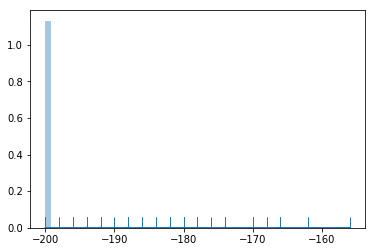

In [0]:
# 10.5 성공적인 에피소드 저장
env = gym.make('MountainCar-v0')

scores = []
training_data = []
accepted_scores = []
required_score = -198

for i in range(10000):
    if i % 100 == 0:
        print(i)
    env.reset()
    score = 0
    game_memory = []
    previous_obs = []
    
    while True:
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        
        if len(previous_obs) > 0:
            game_memory.append([previous_obs, action])
        
        previous_obs = obs
        if obs[0] > -0.2:
            reward = 1
        
        score += reward
        
        if done:
            break
        
    scores.append(score)
    if score > required_score:
        accepted_scores.append(score)
        for data in game_memory:
            training_data.append(data)

scores = np.array(scores)
print(scores.mean())
print(accepted_scores)

import seaborn as sns
sns.distplot(scores, rug=True)

In [0]:
# 10.6 training_data 확인
training_data[:5]

[[array([-0.43359795, -0.00067169]), 0],
 [array([-0.43593647, -0.00233852]), 2],
 [array([-0.43792491, -0.00198844]), 1],
 [array([-0.44054885, -0.00262394]), 0],
 [array([-0.44478924, -0.00424039]), 0]]

In [0]:
# 10.7 훈련 데이터 만들기
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

(10149, 2)
(10149, 1)


In [0]:
# 10.8 분류 신경망 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
# 10.9 분류 신경망 학습
history = model.fit(train_X, train_Y, epochs=30, batch_size=16, validation_split=0.25)

Train on 7611 samples, validate on 2538 samples
Epoch 1/30
7611/7611 [==============================] - 3s 413us/sample - loss: 1.0973 - accuracy: 0.3498 - val_loss: 1.0973 - val_accuracy: 0.3412
Epoch 2/30
7611/7611 [==============================] - 2s 301us/sample - loss: 1.0957 - accuracy: 0.3688 - val_loss: 1.0947 - val_accuracy: 0.4153
Epoch 3/30
7611/7611 [==============================] - 2s 309us/sample - loss: 1.0929 - accuracy: 0.3745 - val_loss: 1.0902 - val_accuracy: 0.4074
Epoch 4/30
7611/7611 [==============================] - 2s 305us/sample - loss: 1.0890 - accuracy: 0.3967 - val_loss: 1.0840 - val_accuracy: 0.4066
Epoch 5/30
7611/7611 [==============================] - 2s 306us/sample - loss: 1.0866 - accuracy: 0.4040 - val_loss: 1.0824 - val_accuracy: 0.4157
Epoch 6/30
7611/7611 [==============================] - 2s 306us/sample - loss: 1.0862 - accuracy: 0.3993 - val_loss: 1.0835 - val_accuracy: 0.4031
Epoch 7/30
7611/7611 [==============================] - 2s 300us

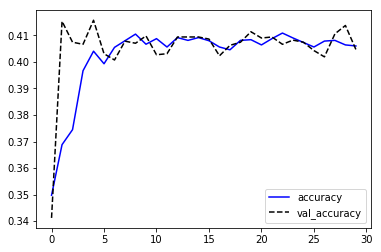

In [0]:
# 10.10 분류 신경망 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.legend()
plt.show()

In [0]:
# 10.11 분류 신경망으로 에이전트 행동 확인
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

scores = []
steps = []
actions = []

for i in range(500):
    if i % 100 == 0:
        print(i)
    score = 0
    step = 0
    previous_obs = []
    env.reset()

    while True:
        if len(previous_obs) == 0:
            action = env.action_space.sample()
        else:
            logit = model.predict(np.expand_dims(previous_obs, axis=0))[0]
            action = np.argmax(logit)
            actions.append(action)
        
        obs, reward, done, info = env.step(action)
        previous_obs = obs
        score += reward
        step += 1

        if done:
            break
    
    scores.append(score)
    steps.append(step)

0
100
200
300
400


-116.96


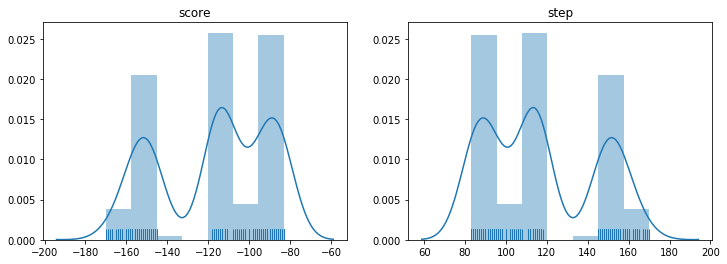

In [0]:
# 10.12 score, step 분포 확인
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

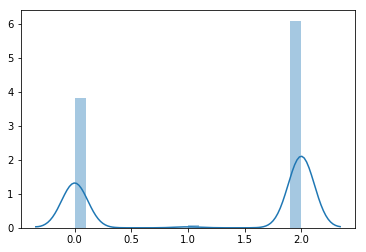

In [0]:
# 10.13 행동 분포 확인
sns.distplot(actions)

In [0]:
# 10.14 분류 신경망 행동 에이전트 실행 결과 확인
env.close()
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

score = 0
step = 0
previous_obs = []
while True:
    if len(previous_obs) == 0:
        action = env.action_space.sample()
    else:
        logit = model.predict(np.expand_dims(previous_obs, axis=0))[0]
#         logit = logit.astype(float)
#         logit = logit / logit.sum()
#         prob = np.random.multinomial(1, logit)
#         action = np.argmax(prob)
        action = np.argmax(logit)
    
    obs, reward, done, info = env.step(action)
    previous_obs = obs
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: -84.0
step: 84


# 10.2 Q-Learning

In [0]:
# 10.15 MountainCarContinuous-v0 환경 만들기
env = gym.make('MountainCarContinuous-v0')

print(env.observation_space)
print(env.observation_space.low)
print(env.observation_space.high)
print()
print(env.action_space)
print(env.action_space.low)
print(env.action_space.high)
print()
print(env._max_episode_steps)

Box(2,)
[-1.2  -0.07]
[0.6  0.07]

Box(1,)
[-1.]
[1.]

999


In [0]:
# 10.16 랜덤 행동 에이전트의 환경 실행 결과 확인(200 스텝 제한)
env.reset()
score = 0
step = 0
    
for i in range(200):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

    previous_obs = obs
    score += reward
    step += 1

    if done:
        break
        
print(score, step)

-6.448577459477894 200


In [0]:
# 10.17 랜덤 행동 에이전트의 환경 실행 결과 확인
env.reset()
score = 0
step = 0
    
while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

    previous_obs = obs
    score += reward
    step += 1

    if done:
        break
        
print(score, step)

-32.83359624686549 999


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
-199.8664
[-188, -186, -182, -190, -178, -190, -194, -190, -176, -190, -174, -196, -192, -190, -178, -192, -180, -182, -186, -194, -184, -184, -178, -188, -180, -178, -190, -186, -156, -160, -186, -178, -186, -192, -184, -178, -192, -180, -178, -194, -186, -170, -192, -182, -188, -192, -180, -192, -196, -178, -172, -190, -194, -154, -184, -184, -186, -188, -172, -182, -174, -170, -174, -184, -172, -182, -184, -176, -184, -172, -188, -176, -196, -190, -184, -176, -192, -178]


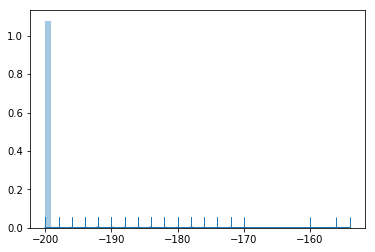

In [0]:
# 10.18 성공적인 에피소드 저장
scores = []
training_data = []
accepted_scores = []
required_score = -198

for i in range(10000):
    if i % 100 == 0:
        print(i)
    env.reset()
    score = 0
    game_memory = []
    previous_obs = []
    
    for i in range(200):
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        
        if len(previous_obs) > 0:
            game_memory.append([previous_obs, action])
        
        previous_obs = obs
        if obs[0] > -0.2:
            reward = 1
        else:
            reward = -1
        
        score += reward
        
        if done:
            break
        
    scores.append(score)
    if score > required_score:
        accepted_scores.append(score)
        for data in game_memory:
            training_data.append(data)

scores = np.array(scores)
print(scores.mean())
print(accepted_scores)

import seaborn as sns
sns.distplot(scores, rug=True)

In [0]:
# 10.19 데이터 준비 및 회귀 모델 정의
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

(15522, 2)
(15522, 1)


In [0]:
# 10.20 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Train on 11641 samples, validate on 3881 samples
Epoch 1/10
11641/11641 [==============================] - 2s 166us/sample - loss: 0.3362 - val_loss: 0.3309
Epoch 2/10
11641/11641 [==============================] - 2s 152us/sample - loss: 0.3324 - val_loss: 0.3299
Epoch 3/10
11641/11641 [==============================] - 2s 147us/sample - loss: 0.3326 - val_loss: 0.3307
Epoch 4/10
11641/11641 [==============================] - 2s 151us/sample - loss: 0.3324 - val_loss: 0.3298
Epoch 5/10
11641/11641 [==============================] - 2s 149us/sample - loss: 0.3319 - val_loss: 0.3302
Epoch 6/10
11641/11641 [==============================] - 2s 155us/sample - loss: 0.3314 - val_loss: 0.3299
Epoch 7/10
11641/11641 [==============================] - 2s 148us/sample - loss: 0.3312 - val_loss: 0.3338
Epoch 8/10
11641/11641 [==============================] - 2s 152us/sample - loss: 0.3317 - val_loss: 0.3322
Epoch 9/10
11641/11641 [==============================] - 2s 150us/sample - loss: 0.331

In [0]:
# 10.21 회귀 신경망으로 에이전트 행동 확인
scores = []
steps = []
actions = []

for i in range(500):
    if i % 100 == 99:
        print(i, 'mean score: {}, mean step: {}'.format(np.mean(scores[-100:]), np.mean(steps[-100:])))
    score = 0
    step = 0
    previous_obs = []
    env.reset()

    while True:
        if len(previous_obs) == 0:
            action = env.action_space.sample()
        else:
            action = model.predict(np.expand_dims(previous_obs, axis=0))[0]
            actions.append(action)
        
        obs, reward, done, info = env.step(action)
        previous_obs = obs
        score += reward
        step += 1

        if done:
            break
    
    scores.append(score)
    steps.append(step)

99 mean score: -1.100744870907116, mean step: 999.0
199 mean score: -1.041986084455691, mean step: 999.0
299 mean score: -1.0874895520162853, mean step: 999.0
399 mean score: -1.0524009178806997, mean step: 999.0
499 mean score: -1.0328159498929186, mean step: 999.0


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


-1.0622296099854724


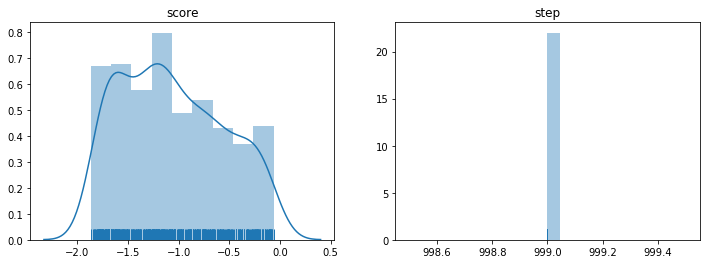

In [0]:
# 10.22 score, step 분포 확인
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

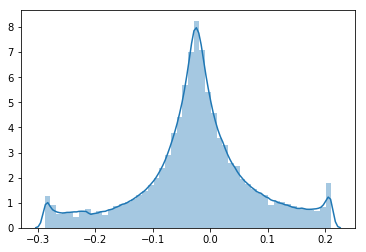

In [0]:
# 10.23 행동 분포 확인
sns.distplot(actions)

In [0]:
# 10.24 회귀 신경망 행동 에이전트 실행 결과 확인
env.close()
env = wrap_env(gym.make('MountainCarContinuous-v0'))
env.reset()

score = 0
step = 0
previous_obs = []
while True:
    if len(previous_obs) == 0:
        action = env.action_space.sample()
    else:
        action = model.predict(np.expand_dims(previous_obs, axis=0))[0]
    
    obs, reward, done, info = env.step(action)
    previous_obs = obs
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: -0.8613281325054618
step: 999


In [0]:
# 10.25 관찰 공간과 행동 공간을 격자화
state_grid_count = 10
action_grid_count = 6

q_table = []
for i in range(state_grid_count):
    q_table.append([])
    for j in range(state_grid_count):
        q_table[i].append([])
        for k in range(action_grid_count):
            q_table[i][j].append(1e-4)
            
actions = range(action_grid_count)
actions = np.array(actions).astype(float)
actions *= ((env.action_space.high - env.action_space.low) / (action_grid_count - 1))
actions += env.action_space.low

print(actions)

[-1.         -0.59999999 -0.19999999  0.20000002  0.60000002  1.00000003]


In [0]:
# 10.26 obs_to_state, softmax 함수 정의
import random
def obs_to_state(env, obs):
    obs = obs.flatten()
    low = env.observation_space.low
    high = env.observation_space.high
    idx = (obs - low) / (high - low) * state_grid_count
    idx = [int(x) for x in idx]
    return idx

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    sum_exp_logits = np.sum(exp_logits)
    return exp_logits / sum_exp_logits

In [0]:
# 10.27 큐러닝 에이전트 학습
max_episodes = 10000
scores = []
steps = []
select_actions = []

learning_rate = 0.05
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01

for i in range(max_episodes):
    epsilon *= 0.9
    epsilon = max(epsilon_min, epsilon)
    
    if i % 100 == 0 and i != 0:
        print(i, 'mean score: {}, mean step: {}, epsilon: {}'.format(np.mean(scores[-100:]), np.mean(steps[-100:]), epsilon))
        
    previous_obs = env.reset()
    score = 0
    step = 0
    
    while True:
        state_idx = obs_to_state(env, previous_obs)
        if random.random() < epsilon:
            action_idx = random.randint(0, action_grid_count-1)
            action = actions[action_idx]
        else:
            logits = q_table[state_idx[0]][state_idx[1]]
            action_idx = np.argmax(softmax(logits))
            action = actions[action_idx]
        
        obs, reward, done, info = env.step([action])
        previous_obs = obs
        score += reward
        reward -= 0.05
        step += 1
        
        select_actions.append(action)
        
        new_state_idx = obs_to_state(env, obs)
        
        q_table[state_idx[0]][state_idx[1]][action_idx] = \
            q_table[state_idx[0]][state_idx[1]][action_idx] + \
            learning_rate * (reward + gamma * np.amax(q_table[new_state_idx[0]][new_state_idx[1]]) - q_table[state_idx[0]][state_idx[1]][action_idx])
        
        if done:
            break
    
    scores.append(score)   
    steps.append(step)
    
    if np.mean(scores[-100:]) >= 90:
        print('Solved on episode {}!'.format(i))
        break

100 mean score: -11.704160848858319, mean step: 950.84, epsilon: 0.01
200 mean score: 83.50763955323458, mean step: 462.53, epsilon: 0.01
Solved on episode 213!


39.56371899530265


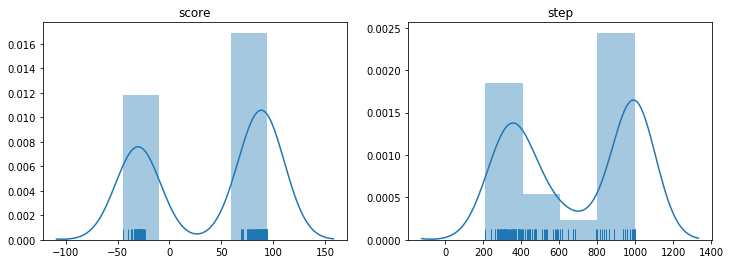

In [0]:
# 10.28 score, step 분포 확인
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

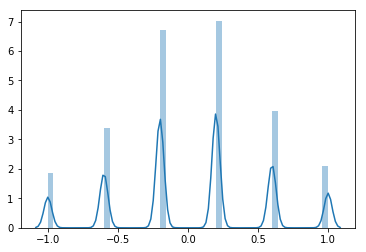

In [0]:
# 10.29 행동 분포 확인
sns.distplot(select_actions)

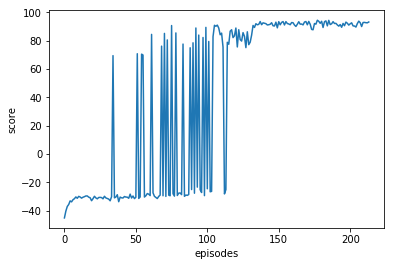

In [0]:
# 10.30 score 그래프
plt.plot(scores)
plt.xlabel('episodes')
plt.ylabel('score')
plt.show()

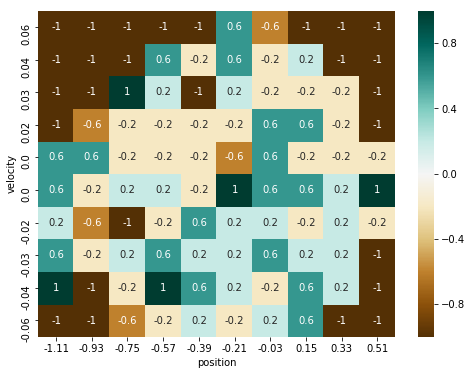

In [0]:
# 10.31 큐테이블 시각화
q_values = []
for i in range(state_grid_count):
    q_values.append([])
    for j in range(state_grid_count):
        action_idx = np.argmax(q_table[i][j])
        q_values[i].append(actions[action_idx])

plt.figure(figsize=(8, 6))
ax = sns.heatmap(q_values, annot=True, cmap='BrBG')
ax.set_xlabel('position')
ax.set_ylabel('velocity')
xticks = env.observation_space.low[0] + range(state_grid_count+1) * abs((env.observation_space.high[0] - env.observation_space.low[0]) / state_grid_count)
xticks = [int((xticks[idx] + xticks[idx+1]) / 2 * 100) / 100 for idx, xtick in enumerate(xticks[:-1])]
ax.set_xticklabels(xticks)
yticks = env.observation_space.low[1] + range(state_grid_count+1) * abs((env.observation_space.high[1] - env.observation_space.low[1]) / state_grid_count)
yticks = [int((yticks[idx] + yticks[idx+1]) / 2 * 100) / 100 for idx, ytick in enumerate(yticks[:-1])]
ax.set_yticklabels(yticks)
ax.invert_yaxis()
plt.show()

In [0]:
# 10.32 큐러닝 에이전트 실행 결과 확인
env.close()
env = wrap_env(gym.make('MountainCarContinuous-v0'))

score = 0
step = 0
previous_obs = env.reset()

while True:
    state_idx = obs_to_state(env, previous_obs)
    if random.random() < epsilon:
        action_idx = random.randint(0, action_grid_count-1)
        action = actions[action_idx]
    else:
        logits = q_table[state_idx[0]][state_idx[1]]
        action_idx = np.argmax(softmax(logits))
        action = actions[action_idx]

    obs, reward, done, info = env.step([action])
    previous_obs = obs
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: 91.52799960207935
step: 422


# 10.3 Deep Q-Learning 네트워크(DQN)

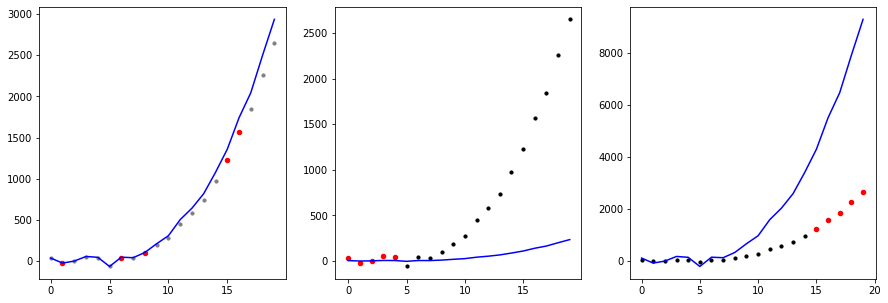

In [0]:
# 그림 10.13 생성 코드
# some code from https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
# some other code from https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

np.random.seed(0)
x = np.array(range(20))
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-40, 40, 20)
x = np.reshape(x, (-1, 1))
y = np.reshape(y, (-1, 1))

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(x,y, s=10, color='gray')

select = np.random.choice(20, 5, replace=False)
select.sort()
clf = Ridge(alpha=100, normalize=True)
clf.fit(x[select], y[select])

plt.scatter(x[select], y[select], s=20, color='r')
plt.plot(x, clf.predict(y) - clf.intercept_, color='blue')


plt.subplot(1, 3, 2)
plt.scatter(x,y, s=10, color='k')

select = np.array(range(5))
clf = Ridge(alpha=100, normalize=True)
clf.fit(x[select], y[select])

plt.scatter(x[select], y[select], s=20, color='r')
plt.plot(x, clf.predict(y) - clf.intercept_, color='blue')


plt.subplot(1, 3, 3)
plt.scatter(x,y, s=10, color='k')

select = np.array(range(15, 20))
clf = Ridge(alpha=100, normalize=True)
clf.fit(x[select], y[select])

plt.scatter(x[select], y[select], s=20, color='r')
plt.plot(x, clf.predict(y) - clf.intercept_, color='blue')



plt.show()


In [0]:
# 10.33 gym_2048 설치
!pip install gym_2048 --no-dependencies

  Created wheel for gym-2048: filename=gym_2048-0.2.6-cp36-none-any.whl size=4682 sha256=3867c4560d6b926e49c1e4cc0c72cb0a55f509a604f769702813037efb7d44c1
  Stored in directory: /root/.cache/pip/wheels/ab/11/22/a6c0fb3622f6fad7e8b7f4342a3c64e115bee08a4189bbae18
Successfully built gym-2048


In [0]:
# 10.34 gym_2048 환경 확인
import gym_2048
import gym

env = gym.make('2048-v0')
obs = env.reset()

print(obs)
print(env.observation_space)
print(env.action_space)

obs, _, _, _ = env.step(0)
print(obs)

[[0 0 0 2]
 [0 0 0 2]
 [0 0 0 0]
 [0 0 0 0]]
Box(4, 4)
Discrete(4)
[[2 0 0 2]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


/usr/local/lib/python3.6/dist-packages/gym_2048/env.py:120: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  board[tile_locs] = tiles


In [0]:
# 10.35 랜덤 행동 에이전트의 실행 결과 확인
score = 0
step = 0
obs = env.reset()

while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    
    score += reward
    step += 1
    if done:
        break
        
print('score:', score, 'step:', step)
print(obs)

score: 356 step: 64
[[ 2  8  2  4]
 [ 4  2 16  2]
 [ 8 16 32 16]
 [ 2  8 16  4]]


/usr/local/lib/python3.6/dist-packages/gym_2048/env.py:120: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  board[tile_locs] = tiles


In [0]:
# 10.36 2048 게임 보드의 원-핫 인코딩 함수
layer_count = 12
table = {2**i:i for i in range(layer_count)}
print(table)

def preprocess(obs):    
    x = np.zeros((4, 4, layer_count))
    for i in range(4):
        for j in range(4):
            if obs[i,j] > 0:
                v = min(obs[i,j], 2**(layer_count-1))
                x[i,j,table[v]] = 1
            else:
                x[i,j,0] = 1
    return x

{1: 0, 2: 1, 4: 2, 8: 3, 16: 4, 32: 5, 64: 6, 128: 7, 256: 8, 512: 9, 1024: 10, 2048: 11}


In [0]:
# 10.37 모델 정의 함수
def build_model():
    dense1 = 128
    dense2 = 128

    x = tf.keras.Input(shape=(4, 4, layer_count))

    conv_a = tf.keras.layers.Conv2D(dense1, kernel_size=(2,1), activation='relu')(x)
    conv_b = tf.keras.layers.Conv2D(dense1, kernel_size=(1,2), activation='relu')(x)

    conv_aa = tf.keras.layers.Conv2D(dense2, kernel_size=(2,1), activation='relu')(conv_a)
    conv_ab = tf.keras.layers.Conv2D(dense2, kernel_size=(1,2), activation='relu')(conv_a)
    conv_ba = tf.keras.layers.Conv2D(dense2, kernel_size=(2,1), activation='relu')(conv_b)
    conv_bb = tf.keras.layers.Conv2D(dense2, kernel_size=(1,2), activation='relu')(conv_b)

    flat = [tf.keras.layers.Flatten()(a) for a in [conv_a, conv_b, conv_aa, conv_ab, conv_ba, conv_bb]]

    concat = tf.keras.layers.Concatenate()(flat)
    dense1 = tf.keras.layers.Dense(256, activation='relu')(concat)
    out = tf.keras.layers.Dense(4, activation='linear')(dense1)

    model = tf.keras.Model(inputs=x, outputs=out)
    model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.0005), loss='mse')
    # model.summary()
    return model

model = build_model()
target_model = build_model()

In [0]:
# 10.38 학습 함수 정의
gamma = 0.9
batch_size = 512
max_memory = batch_size*8
memory = []

def append_sample(state, action, reward, next_state, done):
    memory.append([state, action, reward, next_state, done])

def train_model():
    np.random.shuffle(memory)

    len = max_memory // batch_size
    for k in range(len):
        mini_batch = memory[k*batch_size:(k+1)*batch_size]

        states = np.zeros((batch_size, 4, 4, layer_count))
        next_states = np.zeros((batch_size, 4, 4, layer_count))
        actions, rewards, dones = [], [], []

        for i in range(batch_size):
            states[i] = mini_batch[i][0]
            actions.append(mini_batch[i][1])
            rewards.append(mini_batch[i][2])
            next_states[i] = mini_batch[i][3]
            dones.append(mini_batch[i][4])

        target = model.predict(states)
        next_target = target_model.predict(next_states)

        for i in range(batch_size):
            if dones[i]:
                target[i][actions[i]] = rewards[i]
            else:
                target[i][actions[i]] = rewards[i] + gamma * np.amax(next_target[i])

        model.fit(states, target, batch_size=batch_size, epochs=1, verbose=0)

In [0]:
# 10.39 DQN 학습
import math

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    sum_exp_logits = np.sum(exp_logits)
    return exp_logits / sum_exp_logits

max_episodes = 10001
epsilon = 0.9
epsilon_min = 0.1

scores = []
steps = []
iteration = 0

train_count = 0

for i in range(max_episodes):
    if i % 100 == 0 and i != 0:
        print('score mean:', np.mean(scores[-100:]), 'step mean:', np.mean(steps[-100:]), 'iteration:', iteration, 'epsilon:', epsilon)

    prev_obs = env.reset()

    score = 0
    step = 0
    not_move_list = np.array([1,1,1,1])
    prev_max = np.max(prev_obs)

    while True:
        iteration += 1

        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            x = preprocess(prev_obs)
            logits = model.predict(np.expand_dims(x, axis=0))[0]
            prob = softmax(logits)
            prob = prob * not_move_list
            action = np.argmax(prob)

        obs, reward, done, info = env.step(action)

        score += reward
        step += 1

        # not moved situation
        if reward == 0 and np.array_equal(obs, prev_obs):
            not_move_list[action] = 0
            continue
        else:
            not_move_list = np.array([1,1,1,1])

        # custom reward
        now_max = np.max(obs)
        if prev_max < now_max:
            prev_max = now_max
            reward = math.log(now_max, 2) * 0.1
        else:
            reward = 0

        reward += np.count_nonzero(prev_obs) - np.count_nonzero(obs) + 1

        append_sample(preprocess(prev_obs), action, reward, preprocess(obs), done)

        if len(memory) >= max_memory:
            train_model()
            memory = []

            train_count += 1
            if train_count % 4 == 0:
                target_model.set_weights(model.get_weights())

        prev_obs = obs

        if epsilon > 0.01 and iteration % 2500 == 0:
            epsilon = epsilon / 1.005

        if done:
            break

    scores.append(score)
    steps.append(step)

    print(i, 'score:', score, 'step:', step, 'max tile:', np.max(obs), 'memory len:', len(memory))

/usr/local/lib/python3.6/dist-packages/gym_2048/env.py:120: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  board[tile_locs] = tiles


0 score: 392 step: 69 max tile: 32 memory len: 64
1 score: 552 step: 77 max tile: 64 memory len: 141
2 score: 1292 step: 139 max tile: 128 memory len: 270
3 score: 1664 step: 180 max tile: 128 memory len: 438
4 score: 732 step: 99 max tile: 64 memory len: 532
5 score: 932 step: 121 max tile: 64 memory len: 647
6 score: 752 step: 108 max tile: 64 memory len: 748
7 score: 580 step: 82 max tile: 64 memory len: 827
8 score: 972 step: 104 max tile: 128 memory len: 930
9 score: 352 step: 61 max tile: 32 memory len: 991
10 score: 1180 step: 122 max tile: 128 memory len: 1110
11 score: 1236 step: 131 max tile: 128 memory len: 1238
12 score: 592 step: 83 max tile: 64 memory len: 1317
13 score: 676 step: 96 max tile: 64 memory len: 1408
14 score: 632 step: 86 max tile: 64 memory len: 1494
15 score: 1264 step: 138 max tile: 128 memory len: 1626
16 score: 644 step: 89 max tile: 64 memory len: 1711
17 score: 304 step: 55 max tile: 32 memory len: 1766
18 score: 564 step: 88 max tile: 32 memory len: 

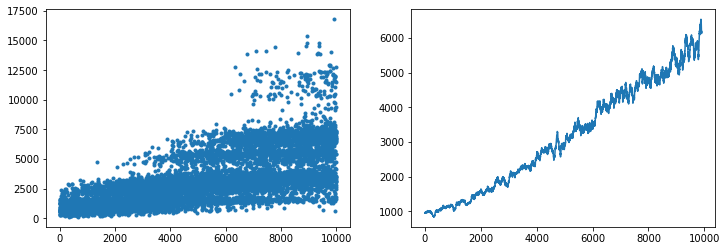

In [0]:
# 10.40 점수 확인
import matplotlib.pyplot as plt

N = 100
rolling_mean = [np.mean(scores[x:x+N]) for x in range(len(scores)-N+1)]

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(scores)), scores, marker='.')
plt.subplot(1, 2, 2)
plt.plot(rolling_mean)
plt.show()

In [0]:
# 10.41 학습 데이터 보강
max_memory = 512*64

action_swap_array = [[0, 0, 2, 2, 1, 3, 1, 3],
                     [1, 3, 1, 3, 0, 0, 2, 2],
                     [2, 2, 0, 0, 3, 1, 3, 1],
                     [3, 1, 3, 1, 2, 2, 0, 0]]

def append_sample(state, action, reward, next_state, done):
    g0 = state
    g1 = g0[::-1,:,:]
    g2 = g0[:,::-1,:]
    g3 = g2[::-1,:,:]
    r0 = state.swapaxes(0,1)
    r1 = r0[::-1,:,:]
    r2 = r0[:,::-1,:]
    r3 = r2[::-1,:,:]

    g00 = next_state
    g10 = g00[::-1,:,:]
    g20 = g00[:,::-1,:]
    g30 = g20[::-1,:,:]
    r00 = next_state.swapaxes(0,1)
    r10 = r00[::-1,:,:]
    r20 = r00[:,::-1,:]
    r30 = r20[::-1,:,:]

    states = [g0, g1, g2, g3, r0, r1, r2, r3]
    next_states = [g00, g10, g20, g30, r00, r10, r20, r30]

    for i in range(8):
        memory.append([
            states[i],
            action_swap_array[action][i],
            reward,
            next_states[i],
            done
        ])

In [0]:
# 10.42 DQN 학습 (학습 데이터 보강)
max_episodes = 10001
epsilon = 0.9
epsilon_min = 0.1

scores = []
steps = []
iteration = 0
train_count = 0

for i in range(max_episodes):
    if i % 100 == 0 and i != 0:
        print('score mean:', np.mean(scores[-100:]), 'step mean:', np.mean(steps[-100:]), 'iteration:', iteration, 'epsilon:', epsilon)

    prev_obs = env.reset()

    score = 0
    step = 0
    not_move_list = np.array([1,1,1,1])
    prev_max = np.max(prev_obs)

    while True:
        iteration += 1

        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            x = preprocess(prev_obs)
            logits = model.predict(np.expand_dims(x, axis=0))[0]
            prob = softmax(logits)
            prob = prob * not_move_list
            action = np.argmax(prob)

        obs, reward, done, info = env.step(action)

        score += reward
        step += 1

        # not moved situation
        if reward == 0 and np.array_equal(obs, prev_obs):
            not_move_list[action] = 0
            continue
        else:
            not_move_list = np.array([1,1,1,1])

        # custom reward
        now_max = np.max(obs)
        if prev_max < now_max:
            prev_max = now_max
            reward = math.log(now_max, 2) * 0.1
        else:
            reward = 0

        reward += np.count_nonzero(prev_obs) - np.count_nonzero(obs) + 1

        append_sample(preprocess(prev_obs), action, reward, preprocess(obs), done)

        if len(memory) >= max_memory:
            train_model()
            memory = []

            train_count += 1
            if train_count % 4 == 0:
                target_model.set_weights(model.get_weights())

        prev_obs = obs

        if epsilon > 0.01 and iteration % 2500 == 0:
            epsilon = epsilon / 1.005

        if done:
            break

    scores.append(score)
    steps.append(step)

    print(i, 'score:', score, 'step:', step, 'max tile:', np.max(obs), 'memory len:', len(memory))

/usr/local/lib/python3.6/dist-packages/gym_2048/env.py:120: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  board[tile_locs] = tiles


0 score: 684 step: 101 max tile: 64 memory len: 744
1 score: 648 step: 88 max tile: 64 memory len: 1448
2 score: 752 step: 94 max tile: 64 memory len: 2176
3 score: 1324 step: 146 max tile: 128 memory len: 3272
4 score: 1116 step: 128 max tile: 128 memory len: 4216
5 score: 1276 step: 133 max tile: 128 memory len: 5280
6 score: 1224 step: 133 max tile: 128 memory len: 6304
7 score: 880 step: 113 max tile: 64 memory len: 7176
8 score: 916 step: 117 max tile: 64 memory len: 8080
9 score: 532 step: 78 max tile: 64 memory len: 8672
10 score: 612 step: 84 max tile: 64 memory len: 9344
11 score: 2312 step: 206 max tile: 256 memory len: 10912
12 score: 1316 step: 147 max tile: 128 memory len: 12000
13 score: 920 step: 109 max tile: 64 memory len: 12872
14 score: 656 step: 91 max tile: 64 memory len: 13592
15 score: 908 step: 114 max tile: 64 memory len: 14440
16 score: 1316 step: 141 max tile: 128 memory len: 15528
17 score: 1248 step: 123 max tile: 128 memory len: 16512
18 score: 900 step: 1

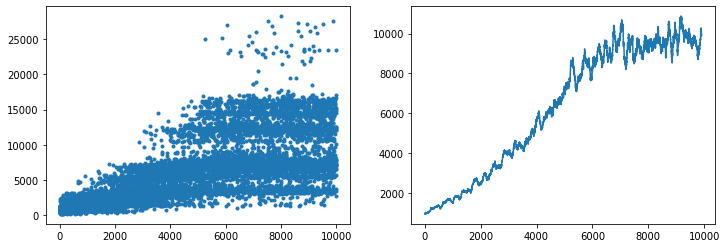

In [0]:
# 10.42 점수 확인
import matplotlib.pyplot as plt

N = 100
rolling_mean = [np.mean(scores[x:x+N]) for x in range(len(scores)-N+1)]

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(scores)), scores, marker='.')
plt.subplot(1, 2, 2)
plt.plot(rolling_mean)
plt.show()

In [0]:
# 10.43 1,000 게임 테스트
test_scores = []
max_tile = {}
iteration = 0
train_count = 0

for i in range(1000):
    if i % 100 == 0 and i != 0:
        print('score mean:', np.mean(scores[-100:]), 'step mean:', np.mean(steps[-100:]), 'iteration:', iteration, 'epsilon:', epsilon)

    prev_obs = env.reset()

    score = 0
    step = 0
    not_move_list = np.array([1,1,1,1])

    while True:
        iteration += 1

        x = preprocess(prev_obs)
        logits = model.predict(np.expand_dims(x, axis=0))[0]
        prob = softmax(logits)
        prob = prob * not_move_list
        action = np.argmax(prob)

        obs, reward, done, info = env.step(action)

        score += reward
        step += 1

        # not moved situation
        if reward == 0 and np.array_equal(obs, prev_obs):
            not_move_list[action] = 0
            continue
        else:
            not_move_list = np.array([1,1,1,1])

        prev_obs = obs

        if done:
            now_max = np.max(obs)
            max_tile[now_max] = max_tile.get(now_max, 0) + 1
            break

    test_scores.append(score)
    print(i, 'score:', score, 'step:', step, 'max tile:', np.max(obs))

print(max_tile)

/usr/local/lib/python3.6/dist-packages/gym_2048/env.py:120: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  board[tile_locs] = tiles


0 score: 12344 step: 745 max tile: 1024 memory len: 14472
1 score: 14452 step: 832 max tile: 1024 memory len: 14472
2 score: 15600 step: 911 max tile: 1024 memory len: 14472
3 score: 7684 step: 528 max tile: 512 memory len: 14472
4 score: 26368 step: 1378 max tile: 2048 memory len: 14472
5 score: 12140 step: 722 max tile: 1024 memory len: 14472
6 score: 16448 step: 972 max tile: 1024 memory len: 14472
7 score: 7196 step: 493 max tile: 512 memory len: 14472
8 score: 16424 step: 974 max tile: 1024 memory len: 14472
9 score: 13464 step: 803 max tile: 1024 memory len: 14472
10 score: 6732 step: 459 max tile: 512 memory len: 14472
11 score: 5568 step: 397 max tile: 512 memory len: 14472
12 score: 12252 step: 730 max tile: 1024 memory len: 14472
13 score: 13244 step: 795 max tile: 1024 memory len: 14472
14 score: 14740 step: 864 max tile: 1024 memory len: 14472
15 score: 7572 step: 521 max tile: 512 memory len: 14472
16 score: 14740 step: 866 max tile: 1024 memory len: 14472
17 score: 7140 s

In [0]:
# 그림 10.19의 data_augmentation, 15 conv layers 코드
# build_model() 함수만 수정되었습니다.
max_episodes = 10001
epsilon = 0.9
epsilon_min = 0.1

scores = []
steps = []
iteration = 0
train_count = 0

def build_model():
    dense1 = 128
    dense2 = 128
    dense3 = 128

    x = tf.keras.Input(shape=(4, 4, layer_count))

    conv_a = tf.keras.layers.Conv2D(dense1, kernel_size=(2,1), activation='relu')(x)
    conv_b = tf.keras.layers.Conv2D(dense1, kernel_size=(1,2), activation='relu')(x)

    conv_aa = tf.keras.layers.Conv2D(dense2, kernel_size=(2,1), activation='relu')(conv_a)
    conv_ab = tf.keras.layers.Conv2D(dense2, kernel_size=(1,2), activation='relu')(conv_a)
    conv_ba = tf.keras.layers.Conv2D(dense2, kernel_size=(2,1), activation='relu')(conv_b)
    conv_bb = tf.keras.layers.Conv2D(dense2, kernel_size=(1,2), activation='relu')(conv_b)

    conv_aaa = tf.keras.layers.Conv2D(dense3, kernel_size=(2,1), activation='relu')(conv_aa)
    conv_aba = tf.keras.layers.Conv2D(dense3, kernel_size=(1,2), activation='relu')(conv_ab)
    conv_aab = tf.keras.layers.Conv2D(dense3, kernel_size=(2,1), activation='relu')(conv_aa)
    conv_abb = tf.keras.layers.Conv2D(dense3, kernel_size=(1,2), activation='relu')(conv_ab)
    conv_baa = tf.keras.layers.Conv2D(dense3, kernel_size=(2,1), activation='relu')(conv_ba)
    conv_bba = tf.keras.layers.Conv2D(dense3, kernel_size=(1,2), activation='relu')(conv_bb)
    conv_bab = tf.keras.layers.Conv2D(dense3, kernel_size=(2,1), activation='relu')(conv_ba)
    conv_bbb = tf.keras.layers.Conv2D(dense3, kernel_size=(1,2), activation='relu')(conv_bb)

    flat = [tf.keras.layers.Flatten()(a) for a in [
        conv_a, conv_b, conv_aa, conv_ab, conv_ba, conv_bb,
        conv_aaa, conv_aba, conv_aab, conv_abb, conv_baa, conv_bba, conv_bab, conv_bbb
    ]]

    concat = tf.keras.layers.Concatenate()(flat)
    dense1 = tf.keras.layers.Dense(256, activation='relu')(concat)
    out = tf.keras.layers.Dense(4, activation='linear')(dense1)

    model = tf.keras.Model(inputs=x, outputs=out)
    model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.0005), loss='mse')
    model.summary()
    return model

for i in range(max_episodes):
    if i % 100 == 0 and i != 0:
        print('score mean:', np.mean(scores[-100:]), 'step mean:', np.mean(steps[-100:]), 'iteration:', iteration, 'epsilon:', epsilon)

    prev_obs = env.reset()

    score = 0
    step = 0
    not_move_list = np.array([1,1,1,1])
    prev_max = np.max(prev_obs)

    while True:
        iteration += 1

        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            x = preprocess(prev_obs)
            logits = model.predict(np.expand_dims(x, axis=0))[0]
            prob = softmax(logits)
            prob = prob * not_move_list
            action = np.argmax(prob)

        obs, reward, done, info = env.step(action)

        score += reward
        step += 1

        # not moved situation
        if reward == 0 and np.array_equal(obs, prev_obs):
            not_move_list[action] = 0
            continue
        else:
            not_move_list = np.array([1,1,1,1])

        # custom reward
        now_max = np.max(obs)
        if prev_max < now_max:
            prev_max = now_max
            reward = math.log(now_max, 2) * 0.1
        else:
            reward = 0

        reward += np.count_nonzero(prev_obs) - np.count_nonzero(obs) + 1

        append_sample(preprocess(prev_obs), action, reward, preprocess(obs), done)

        if len(memory) >= max_memory:
            train_model()
            memory = []

            train_count += 1
            if train_count % 4 == 0:
                target_model.set_weights(model.get_weights())

        prev_obs = obs

        if epsilon > 0.01 and iteration % 2500 == 0:
            epsilon = epsilon / 1.005

        if done:
            break

    scores.append(score)
    steps.append(step)

    print(i, 'score:', score, 'step:', step, 'max tile:', np.max(obs), 'memory len:', len(memory))

In [0]:
# 그림 10.19의 data_augmentation, 24 conv layers 코드
# build_model() 함수만 수정되었습니다.
max_episodes = 10001
epsilon = 0.9
epsilon_min = 0.1

scores = []
steps = []
iteration = 0
train_count = 0

def build_model():
    dense1 = 128
    dense2 = 128
    first_kernels = [[1,2], [2,1], [1,3], [3,1], [2,3], [3,2], [2,2], [3,3]]
    second_kernels = [[1,2], [2,1]]

    x = tf.keras.Input(shape=(4, 4, layer_count))

    conv_first_layers = []
    conv_second_layers = []

    for i in range(len(first_kernels)):
        conv1 = tf.keras.layers.Conv2D(dense1, kernel_size=first_kernels[i], activation='relu')(x)
        conv_first_layers.append(conv1)
        for j in range(len(second_kernels)):
            conv2 = tf.keras.layers.Conv2D(dense2, kernel_size=second_kernels[j], activation='relu')(conv1)
            conv_second_layers.append(conv2)

    flat = [tf.keras.layers.Flatten()(a) for a in conv_first_layers + conv_second_layers]

    concat = tf.keras.layers.Concatenate()(flat)
    dense1 = tf.keras.layers.Dense(256, activation='relu')(concat)
    out = tf.keras.layers.Dense(4, activation='linear')(dense1)

    model = tf.keras.Model(inputs=x, outputs=out)
    model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.0005), loss='mse')
    model.summary()
    return model

for i in range(max_episodes):
    if i % 100 == 0 and i != 0:
        print('score mean:', np.mean(scores[-100:]), 'step mean:', np.mean(steps[-100:]), 'iteration:', iteration, 'epsilon:', epsilon)

    prev_obs = env.reset()

    score = 0
    step = 0
    not_move_list = np.array([1,1,1,1])
    prev_max = np.max(prev_obs)

    while True:
        iteration += 1

        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            x = preprocess(prev_obs)
            logits = model.predict(np.expand_dims(x, axis=0))[0]
            prob = softmax(logits)
            prob = prob * not_move_list
            action = np.argmax(prob)

        obs, reward, done, info = env.step(action)

        score += reward
        step += 1

        # not moved situation
        if reward == 0 and np.array_equal(obs, prev_obs):
            not_move_list[action] = 0
            continue
        else:
            not_move_list = np.array([1,1,1,1])

        # custom reward
        now_max = np.max(obs)
        if prev_max < now_max:
            prev_max = now_max
            reward = math.log(now_max, 2) * 0.1
        else:
            reward = 0

        reward += np.count_nonzero(prev_obs) - np.count_nonzero(obs) + 1

        append_sample(preprocess(prev_obs), action, reward, preprocess(obs), done)

        if len(memory) >= max_memory:
            train_model()
            memory = []

            train_count += 1
            if train_count % 4 == 0:
                target_model.set_weights(model.get_weights())

        prev_obs = obs

        if epsilon > 0.01 and iteration % 2500 == 0:
            epsilon = epsilon / 1.005

        if done:
            break

    scores.append(score)
    steps.append(step)

    print(i, 'score:', score, 'step:', step, 'max tile:', np.max(obs), 'memory len:', len(memory))